<h2>About</h2>
This notebook contains data analysis and exploration of the dataset containing data about AirBnB statistics in New York City from the year 2019. The dataset has around 49000 observations in 16 columns, containing both categorical and numerical data. Data taken from Kaggle.

<h3>Basic information of the dataset</h3>

In this section, we are importing the necessary libraries for analysing the data, reading it into a pandas DataFrame, and getting to know what kind of data is inside.

In [199]:
#import necessary libraries for analysis of dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [200]:
#read csv file into pandas dataframe
df = pd.read_csv('AB_NYC_2019.csv')

In [201]:
#explore first five rows from the dataset to see how the data is arranged
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [202]:
#check the total number of rows in the set
len(df)

48895

In [203]:
#check the datatype of each column 
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [204]:
#check the different values of neighbourhood_group column
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [205]:
#check the different values of neighbourhood column
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [206]:
#check the different values of room_type column
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

The df.head() told us that there at least some null valued cells in the dataset, at least in the last_review and reviews_per_month columns. This is due to the value in number_of_reviews column being 0. We can fill the reviews_per_month values with 0, and drop the entire last_review column, since it doesn't provide any necessary data for us. Also we want to change the neighbourhood_groups column's name to boroughs for better description. But first, let's see if there are any other columns with null values.

In [207]:
#check if there are other null valued columns
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [208]:
#fill reviews_per_month null values with 0
df.fillna({'reviews_per_month':0}, inplace=True)

#drop the entire last_review column
df = df.drop(columns='last_review')

In [209]:
#check results
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [210]:
#rename the neighbourhood_group column to borough
df = df.rename(columns={'neighbourhood_group' : 'borough'})

<h3>Exploring and visualizing the data</h3>

In [211]:
#find the number of listings in each borough
listings_by_borough= df.groupby('borough').id.count().reset_index()

Text(0, 0.5, 'Count')

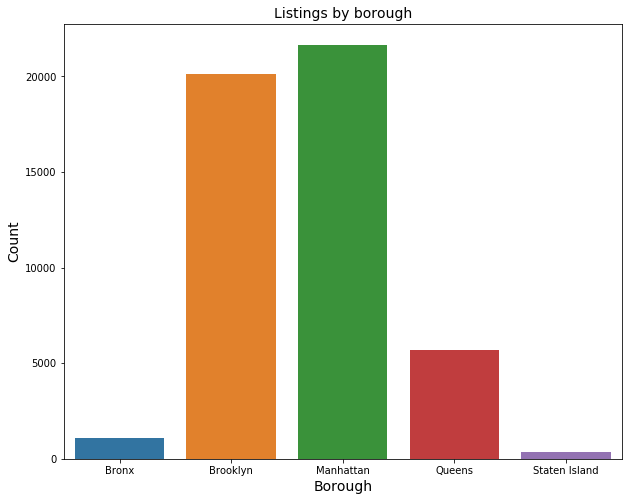

In [212]:
#plot listings of each borough in a barplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='borough', y='id', data=listings_by_borough)
ax.set_title('Listings by borough', fontsize=14)
ax.set_xlabel('Borough', fontsize= 14)
ax.set_ylabel('Count', fontsize= 14)


From this graph, we can see that Manhattan and Brooklyn have the most listings in NYC. It shouldn't come as a surprise, given that Manhattan is considered the center of New York City, and Brooklyn is the most populated of the five boroughs.

In [213]:
#find the average price per borough
avg_price_borough = df.groupby('borough').price.mean().reset_index()
avg_price_borough

,borough,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


Text(0, 0.5, 'Average price')

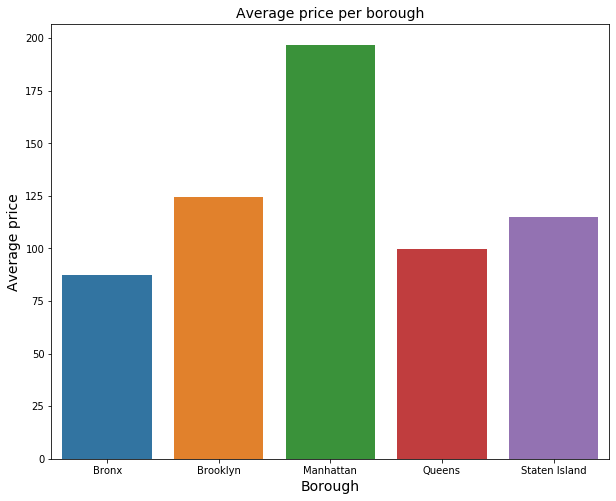

In [214]:
#plot the average price of listings each borough in a barplot
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='borough', y='price', data=avg_price_borough)
ax.set_title('Average price per borough', fontsize=14)
ax.set_xlabel('Borough', fontsize=14)
ax.set_ylabel('Average price', fontsize=14)

From this graph we can see the quite large price gap between Manhattan and the other boroughs. While the other four boroughs average at around $100 per room, in Manhattan it's almost the double of that. The higher prices in Manhattan were expected to some level, but for them to be almost double that of the other boroughs is quite remarkable. This is probably due to the high cost of living and basically everything in Manhattan.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

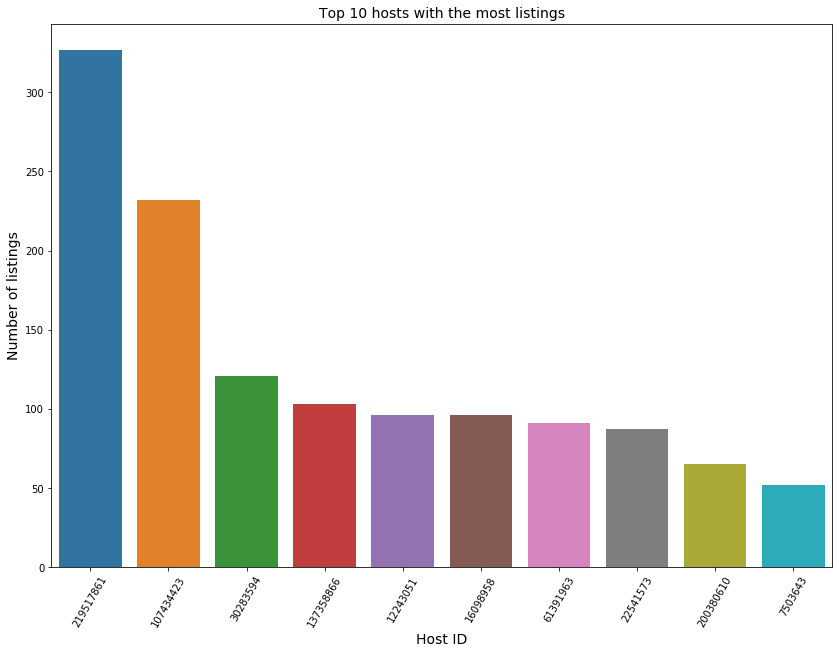

In [223]:
#a barplot depicting the top 10 hosts with the most listings
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x = "host_id", order=df['host_id'].value_counts().index[0:10] ,data=df)
ax.set_title('Top 10 hosts with the most listings', fontsize=14)
ax.set_xlabel('Host ID', fontsize= 14)
ax.set_ylabel('Number of listings', fontsize=14)
plt.xticks(rotation=60)

This graph shows that apart from the top 2, the hosts with the most listings are quite evenly distributed.

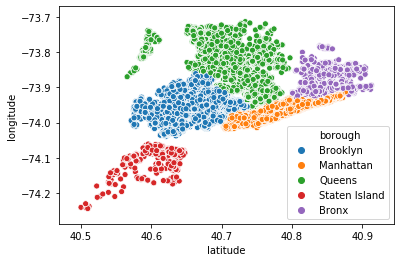

In [228]:
#a scatterplot depicting the locations of listings in NYC on a map
sns.scatterplot(x=df.latitude, y=df.longitude, hue=df.borough)

A simple map showing the locations of listing in NYC, nothing special here.
Below is some code that finds out what the 20 most used words in listings' names' are.

In [240]:
#an empty list, where the string values from the name column are to be stored
name_strings = []
for i in df.name: #loop through all the values of the name column and store each value as a string
    name_strings.append(i)
def name_splitter(name):#a function that removes whitespace from strings from strings in name_strings list
    splt = str(name).split()
    return splt
words = [] #an empty list where single words taken from name_strings strings are to be stored
for i in name_strings:
    for j in name_splitter(i):#loop through all the values in name_strings, and call name_splitter with said values
        j = j.lower()#make all words lowercase to avoid duplicates
        words.append(j)#append final product to words list
    
    

In [241]:
from collections import Counter #import Counter from collections-library
top20_words = Counter(words).most_common()#find out the most common words in words-list...
top20_words = top20_words[:20]#..and take the 20 most common of them
top20_words

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820)]

In [251]:
df2 = pd.DataFrame(top20_words)#make a DataFrame out of top20 words list
df2.rename(columns={0:'Words', 1:'Count'}, inplace=True)#rename columns to words and count
df2

,Words,Count
0,in,16733
1,room,9389
2,bedroom,7231
3,private,6985
4,apartment,6113
5,cozy,4634
6,the,3869
7,to,3827
8,studio,3772
9,brooklyn,3629


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

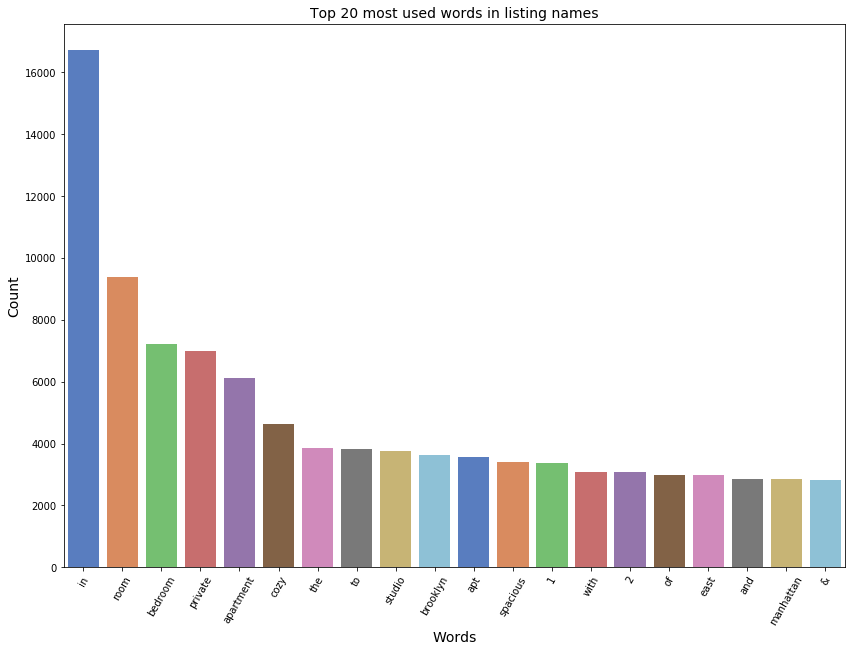

In [302]:
#a barplot depicting the top20 most used words in listing names
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x='Words', y='Count', data=df2, palette='muted')
ax.set_title('Top 20 most used words in listing names', fontsize = 14)
ax.set_xlabel('Words', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
plt.xticks(rotation = 60)

This graph is quite interesting. It shows that the most used words are short and very informative in nature. Usually giving information about whether a whole apartment is being rent or just a room, and the location. Fancy words like spacious and beautiful, which give little to no real information to the renter, are being used sustantially less.

In [305]:
#find out average price per room type for each borough
avg_price_per_room_type_per_borough = pd.pivot_table(df, columns='room_type', index='borough', values='price', aggfunc= np.mean)
avg_price_per_room_type_per_borough

room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Average price')

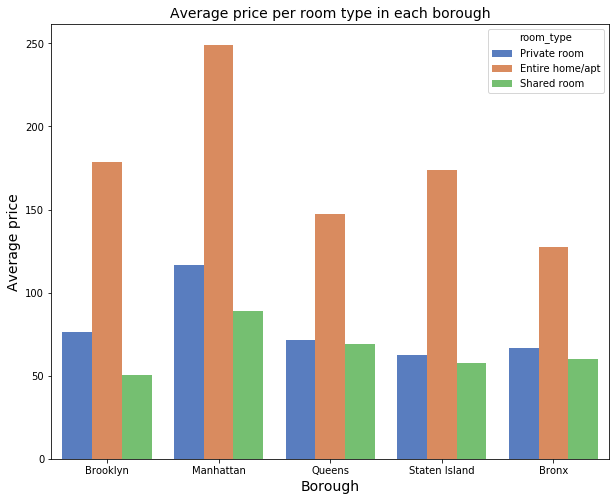

In [303]:
#a barplot depicting the average price per room type for each borough
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='borough', y='price', data=df, hue='room_type', ci=None, palette='muted')
ax.set_title('Average price per room type in each borough', fontsize = 14)
ax.set_xlabel('Borough', fontsize = 14)
ax.set_ylabel('Average price', fontsize= 14)



From this graph we can see how room type affects prices in each borough. Renting an entire apartment is obviously more expensive than just renting a room, but interestingly enough, the price difference between a shared room and a private room is not that big. In Queens and Staten Island, the average price is practically the same!

<h3>Conclusions</h3>
This dataset contains a lot of interesting information, that we will have to get back to analyzing. So far, we've learned that there are differences in listings, especially location matters. Also we have learned that the most prolific renters have done hundreds of listings. The descriptions of the listings are concise, factual and use no fancy language, to give the customers the information they need and do it quickly.